In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error as rmse

In [2]:
def remove_extreme_values(df):
#     for c in df.columns:
#         if c.find('_estimate') != -1:
#             df = df[df[c] > df[c].min()+0.0001]
#             df = df[df[c] < df[c].max()-0.0001]
    return df

In [3]:
recovery_2d_2 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_IE_DE/IE_2d_recovery_2.csv', index_col=0))
recovery_3d_2 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_IE_DE/IE_3d_recovery_2.csv', index_col=0))
recovery_4d_2 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_IE_DE/IE_4d_recovery_2.csv', index_col=0))

recovery_2d_15 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_IE_DE/IE_2d_recovery_15.csv', index_col=0))
recovery_3d_15 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_IE_DE/IE_3d_recovery_15.csv', index_col=0))
recovery_4d_15 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_IE_DE/IE_4d_recovery_15.csv', index_col=0))

recovery_2d_1 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_IE_DE/IE_2d_recovery_1.csv', index_col=0))
recovery_3d_1 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_IE_DE/IE_3d_recovery_1.csv', index_col=0))
recovery_4d_1 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_IE_DE/IE_4d_recovery_1.csv', index_col=0))

recovery_2d_05 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_IE_DE/IE_2d_recovery_05.csv', index_col=0))
recovery_3d_05 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_IE_DE/IE_3d_recovery_05.csv', index_col=0))
recovery_4d_05 = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_IE_DE/IE_4d_recovery_05.csv', index_col=0))

recovery_2d = [recovery_2d_2, recovery_2d_15, recovery_2d_1, recovery_2d_05]
recovery_3d = [recovery_3d_2, recovery_3d_15, recovery_3d_1, recovery_3d_05]
recovery_4d = [recovery_4d_2, recovery_4d_15, recovery_4d_1, recovery_4d_05]

mu_2d_true = [np.append([recovery_2d[i]['mu1_true'], 
                         recovery_2d[i]['mu2_true']], 0) for i in range(4)]
mu_2d_estimate = [np.append([recovery_2d[i]['mu1_estimate'], 
                          recovery_2d[i]['mu2_estimate']], 0) for i in range(4)]

mu_3d_true = [np.append([recovery_3d[i]['mu1_true'], 
                      recovery_3d[i]['mu2_true'], 
                      recovery_3d[i]['mu3_true']], 0) for i in range(4)]
mu_3d_estimate = [np.append([recovery_3d[i]['mu1_estimate'], 
                          recovery_3d[i]['mu2_estimate'], 
                          recovery_3d[i]['mu3_estimate']], 0) for i in range(4)]

mu_4d_true = [np.append([recovery_4d[i]['mu1_true'], 
                      recovery_4d[i]['mu2_true'], 
                      recovery_4d[i]['mu3_true'],
                      recovery_4d[i]['mu4_true']], 0) for i in range(4)]
mu_4d_estimate = [np.append([recovery_4d[i]['mu1_estimate'], 
                          recovery_4d[i]['mu2_estimate'], 
                          recovery_4d[i]['mu3_estimate'],
                          recovery_4d[i]['mu4_estimate']], 0) for i in range(4)]

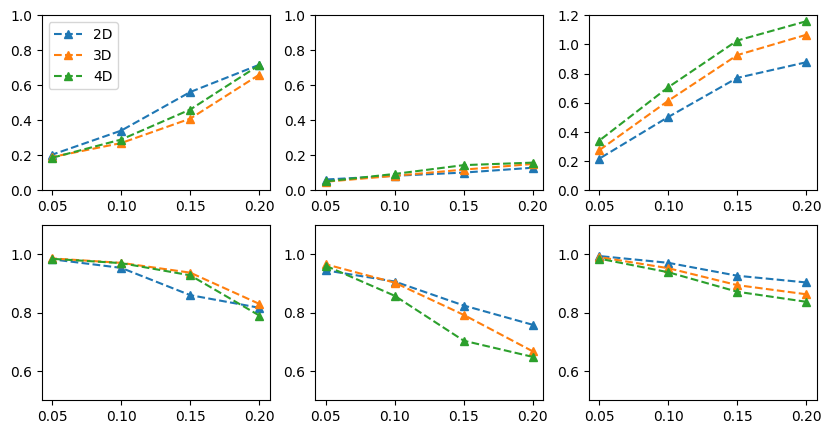

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(231)
plt.ylim([0, 1])
prms = 'threshold'
plt.plot([0.2, 0.15, 0.1, 0.05], 
         [rmse(y_true=recovery_2d[i]['{}_true'.format(prms)],
               y_pred=recovery_2d[i]['{}_estimate'.format(prms)]) for i in range(4)],
         '--^', label='2D');

plt.plot([0.2, 0.15, 0.1, 0.05], 
         [rmse(y_true=recovery_3d[i]['{}_true'.format(prms)],
               y_pred=recovery_3d[i]['{}_estimate'.format(prms)]) for i in range(4)],
         '--^', label='3D');

plt.plot([0.2, 0.15, 0.1, 0.05], 
         [rmse(y_true=recovery_4d[i]['{}_true'.format(prms)],
               y_pred=recovery_4d[i]['{}_estimate'.format(prms)]) for i in range(4)],
         '--^', label='4D');

plt.legend();

plt.subplot(234)
plt.ylim([0.5, 1.1])
plt.plot([0.2, 0.15, 0.1, 0.05], 
         [r2_score(y_true=recovery_2d[i]['{}_true'.format(prms)],
                   y_pred=recovery_2d[i]['{}_estimate'.format(prms)]) for i in range(4)],
         '--^');

plt.plot([0.2, 0.15, 0.1, 0.05], 
         [r2_score(y_true=recovery_3d[i]['{}_true'.format(prms)],
                   y_pred=recovery_3d[i]['{}_estimate'.format(prms)]) for i in range(4)],
         '--^');

plt.plot([0.2, 0.15, 0.1, 0.05], 
         [r2_score(y_true=recovery_4d[i]['{}_true'.format(prms)],
                   y_pred=recovery_4d[i]['{}_estimate'.format(prms)]) for i in range(4)],
         '--^');

plt.subplot(232)
plt.ylim([0, 1])
prms = 'ndt'
plt.plot([0.2, 0.15, 0.1, 0.05], 
         [rmse(y_true=recovery_2d[i]['{}_true'.format(prms)],
               y_pred=recovery_2d[i]['{}_estimate'.format(prms)]) for i in range(4)],
         '--^');

plt.plot([0.2, 0.15, 0.1, 0.05], 
         [rmse(y_true=recovery_3d[i]['{}_true'.format(prms)],
               y_pred=recovery_3d[i]['{}_estimate'.format(prms)]) for i in range(4)],
         '--^');

plt.plot([0.2, 0.15, 0.1, 0.05], 
         [rmse(y_true=recovery_4d[i]['{}_true'.format(prms)],
               y_pred=recovery_4d[i]['{}_estimate'.format(prms)]) for i in range(4)],
         '--^');

plt.subplot(235)
plt.ylim([0.5, 1.1])
plt.plot([0.2, 0.15, 0.1, 0.05], 
         [r2_score(y_true=recovery_2d[i]['{}_true'.format(prms)],
                   y_pred=recovery_2d[i]['{}_estimate'.format(prms)]) for i in range(4)],
         '--^');

plt.plot([0.2, 0.15, 0.1, 0.05], 
         [r2_score(y_true=recovery_3d[i]['{}_true'.format(prms)],
                   y_pred=recovery_3d[i]['{}_estimate'.format(prms)]) for i in range(4)],
         '--^');

plt.plot([0.2, 0.15, 0.1, 0.05], 
         [r2_score(y_true=recovery_4d[i]['{}_true'.format(prms)],
                   y_pred=recovery_4d[i]['{}_estimate'.format(prms)]) for i in range(4)],
         '--^');

plt.subplot(233)
plt.ylim([0, 1.2])
plt.plot([0.2, 0.15, 0.1, 0.05], 
         [rmse(mu_2d_true[i],mu_2d_estimate[i]) for i in range(4)],
         '--^', label='2D');

plt.plot([0.2, 0.15, 0.1, 0.05], 
         [rmse(mu_3d_true[i], mu_3d_estimate[i]) for i in range(4)],
         '--^', label='3D');

plt.plot([0.2, 0.15, 0.1, 0.05], 
         [rmse(mu_4d_true[i], mu_4d_estimate[i]) for i in range(4)],
         '--^', label='4D');

plt.subplot(236)
plt.ylim([0.5, 1.1])
plt.plot([0.2, 0.15, 0.1, 0.05], 
         [r2_score(mu_2d_true[i],mu_2d_estimate[i]) for i in range(4)],
         '--^', label='2D');

plt.plot([0.2, 0.15, 0.1, 0.05], 
         [r2_score(mu_3d_true[i], mu_3d_estimate[i]) for i in range(4)],
         '--^', label='3D');

plt.plot([0.2, 0.15, 0.1, 0.05], [r2_score(mu_4d_true[i], mu_4d_estimate[i]) for i in range(4)],
         '--^', label='4D');